In [1]:
import numpy as np
import pandas as pd

In [2]:
data_set=pd.read_csv("book.csv")

In [3]:
data_set.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# Drop `No` column (it's just an index)
data_set.drop('No', axis=1, inplace=True)

In [5]:
# Rename columns
data_set.columns = ['year', 'month', 'day', 'hour', 'pm25', 'dewp', 'temp', 'pres', 'wind_dir', 'wind_speed', 'snow_hours', 'rain_hours']
data_set.head()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
# Set DateTime Index
data_set['date'] = pd.to_datetime(data_set[['year', 'month', 'day', 'hour']])
data_set.set_index('date', inplace=True)
data_set.head()
data_set.tail()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
date,,,,,,,,,,,,
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2014-12-31 23:00:00,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [7]:
# Drop redundant information (year, month, day, and hour) that is now in the datetime index
data_set = data_set[['pm25', 'dewp', 'temp', 'pres', 'wind_speed', 'snow_hours', 'rain_hours']]

In [8]:
print('Missing values (%)')
print('------------------')
data_set.isnull().sum()/data_set.shape[0]*100

Missing values (%)
------------------


pm25          4.716594
dewp          0.000000
temp          0.000000
pres          0.000000
wind_speed    0.000000
snow_hours    0.000000
rain_hours    0.000000
dtype: float64

In [9]:
data_set.dropna(how='any', inplace=True)
data_set.shape

(41757, 7)

In [10]:
data_set.head(10)

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,12.51,0,0


In [11]:
from datetime import datetime, date
# Save cleaned dataset 
#filename = 'persistence/cleaned_data_' + str(date.today()) + '.csv'
data_set.to_csv('cleaned_data_' + str(date.today()) + '.csv', date_format='%Y-%m-%d %H:%M:%S')

In [12]:
# Import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [13]:
# Import cleaned dataset
df= pd.read_csv('cleaned_data_2019-07-11.csv', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 8 columns):
date          41757 non-null object
pm25          41757 non-null float64
dewp          41757 non-null int64
temp          41757 non-null float64
pres          41757 non-null float64
wind_speed    41757 non-null float64
snow_hours    41757 non-null int64
rain_hours    41757 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.5+ MB


In [14]:
df.head()

,date,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


In [15]:
df.describe()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


<Figure size 1080x3024 with 0 Axes>

Text(0, 0.5, 'PM 2.5 (ug/m3)')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Original Time Series')

(0, 1000)

Text(0, 0.5, 'Temperature (C)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Dewpoint (C)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Pressure (hPa)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Wind Speed (m/s)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Hours of Snow')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Hours of Rain')

Text(0.5, 0, 'Year')

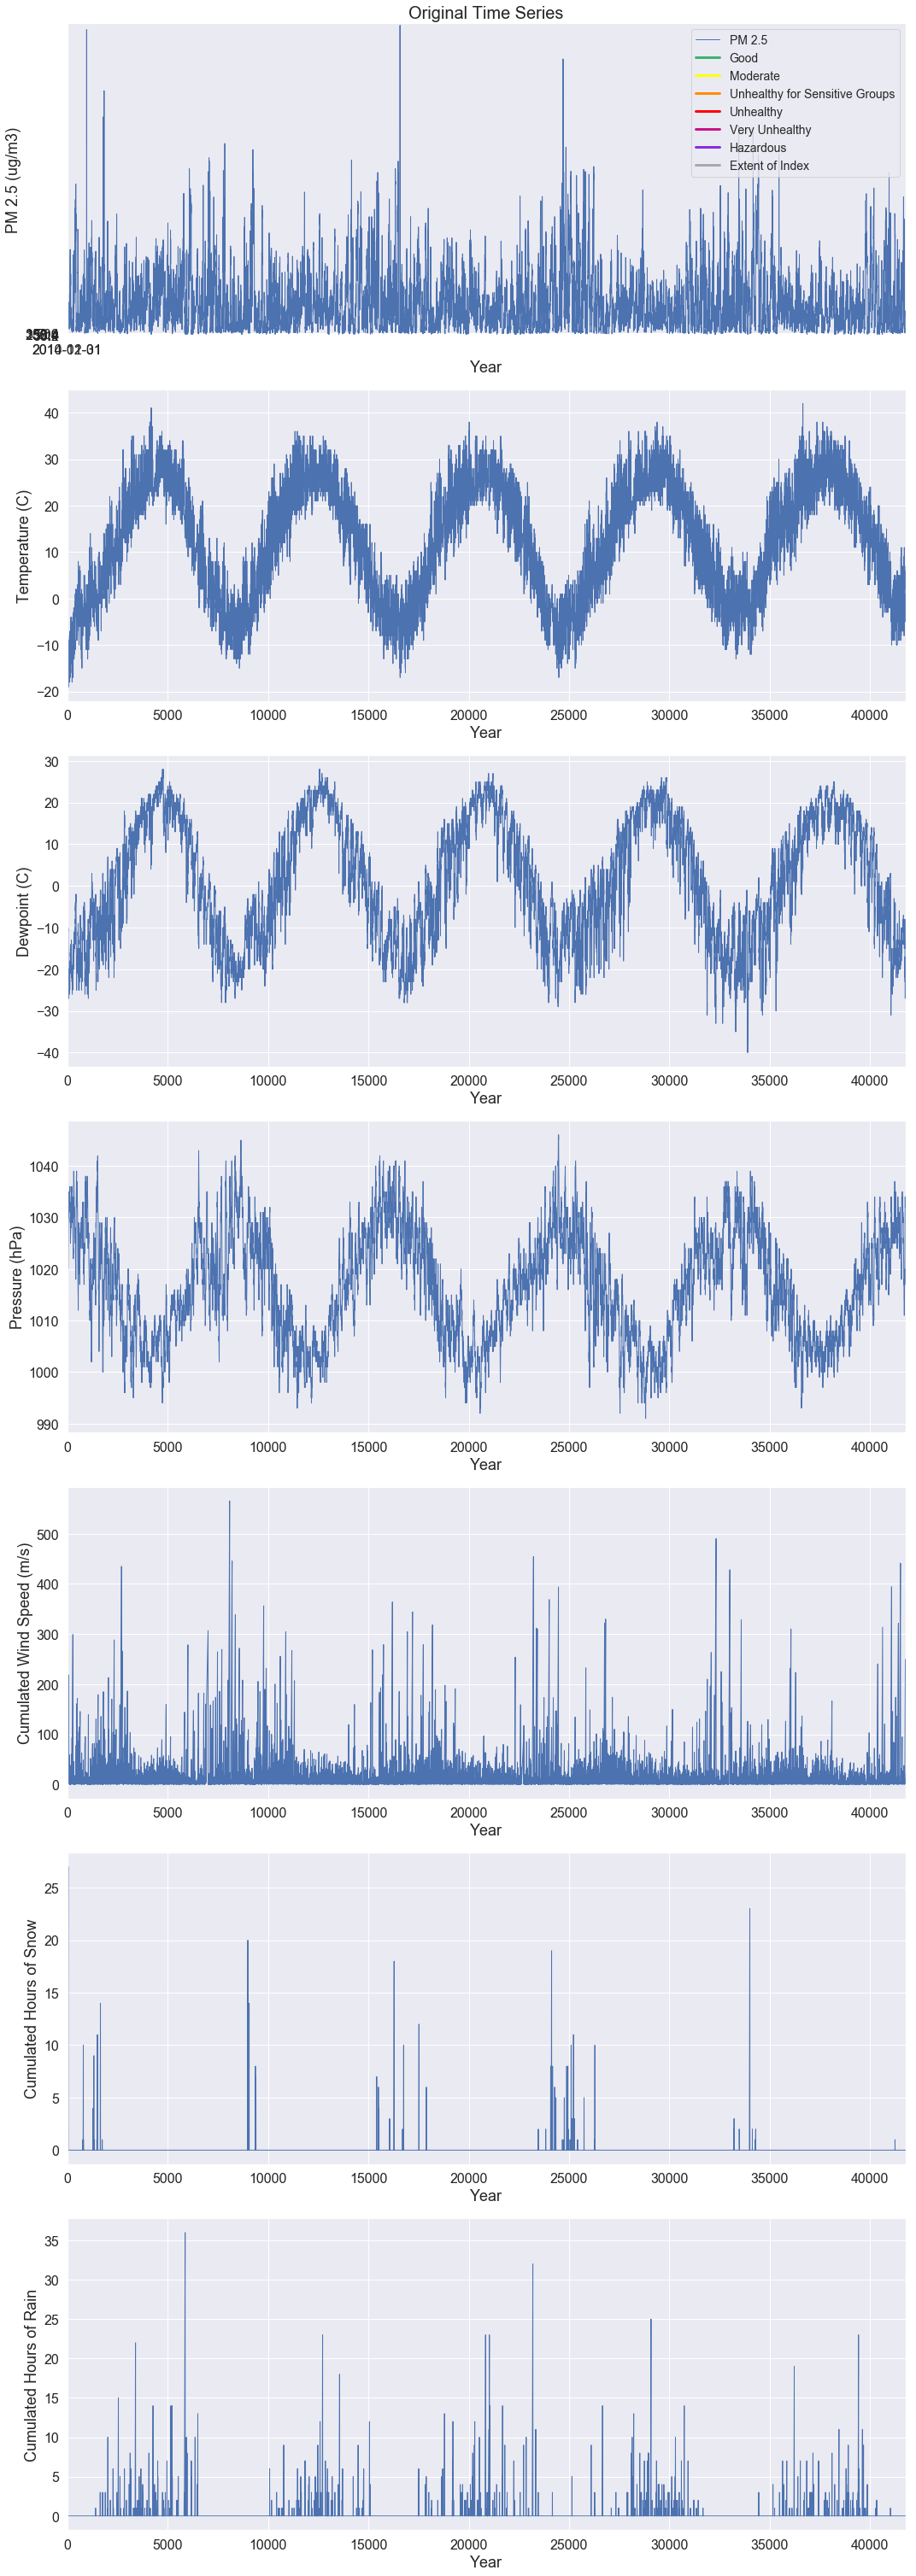

In [16]:
#  Let's look at all of the time series
plt.figure(figsize=(15, 42))
plt.subplot(7,1,1)
df['pm25'].plot(linewidth=1, fontsize=16) #'lightslategray') #lightsteelblue
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.title('Original Time Series', fontsize=20)
plt.ylim([0,1000])
plt.plot(['2010-01-01', '2014-12-31'],['12', '12'], color='mediumseagreen', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['35.4', '35.4'], color='yellow', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['55.4', '55.4'], color='darkorange', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['150.4', '150.4'], color='red', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['250.4', '250.4'], color='mediumvioletred', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['350.4', '350.4'], color='blueviolet', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['500', '500'], color='darkgray', linewidth=3)
plt.legend(['PM 2.5', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Extent of Index'], fontsize=14)
# Legend based on updated 2012 EPA PM 2.5 standard

plt.subplot(7,1,2)
df['temp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,3)
df['dewp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Dewpoint (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,4)
df['pres'].plot(linewidth=1, fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,5)
df['wind_speed'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Wind Speed (m/s)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,6)
df['snow_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Snow', fontsize=18) 
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,7)
df['rain_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Rain', fontsize=18) 
plt.xlabel('Year', fontsize=18)
plt.tight_layout()

# plt.savefig('Desktop/ml/air_quality.png');


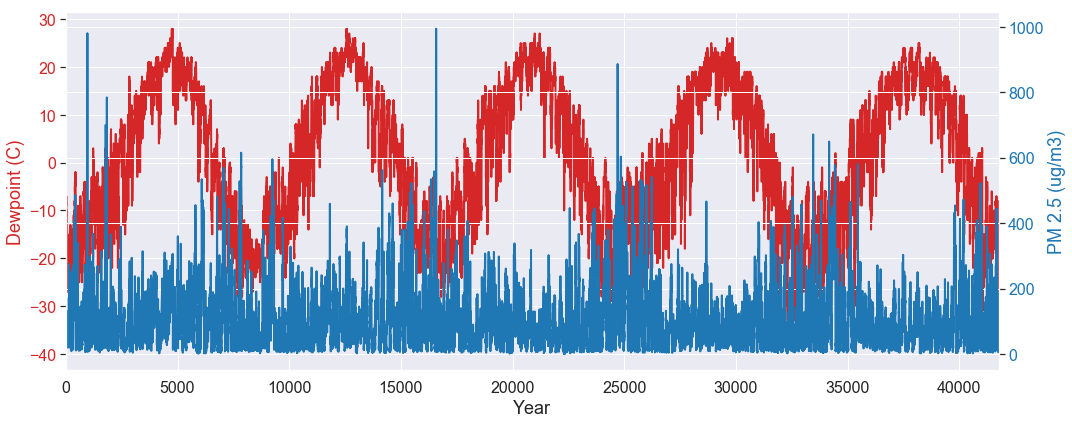

In [17]:
# Look for correlation between pm25 and dewpoint
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['dewp']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Dewpoint (C)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();

temprature and Dewpoint are anti-correlated

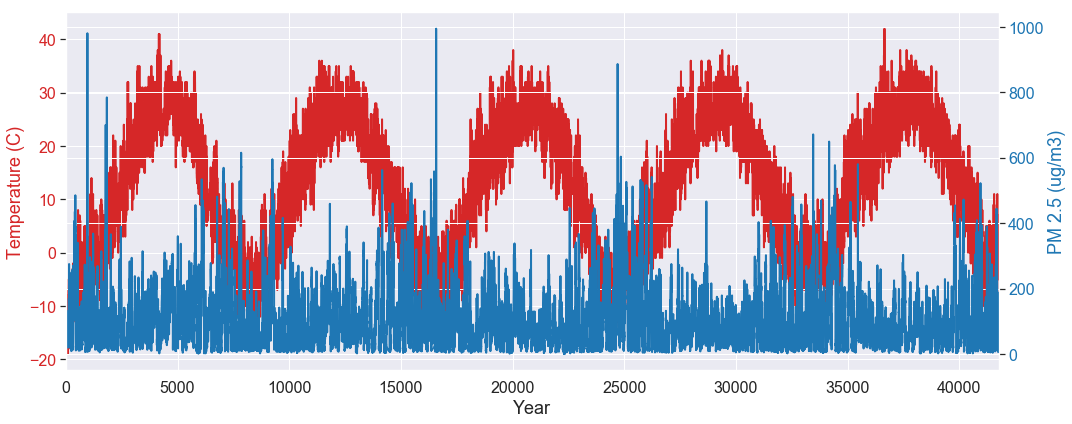

In [18]:
# Look for correlation between pm25 and temperature
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['temp']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Temperature (C)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();

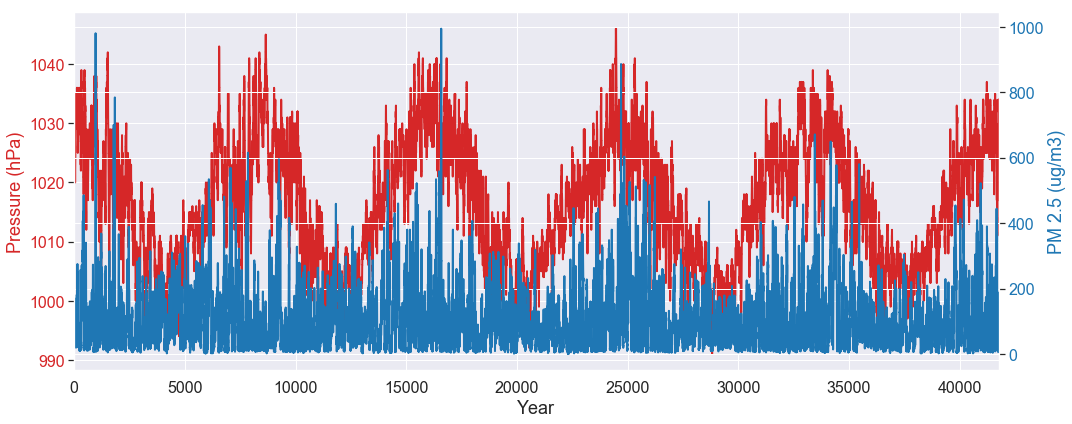

In [19]:
# Look for correlation between pm25 and pressure
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['pres']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Pressure (hPa)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();


Surface pressure and PM 2.5 correlate well and have similar seasonality.

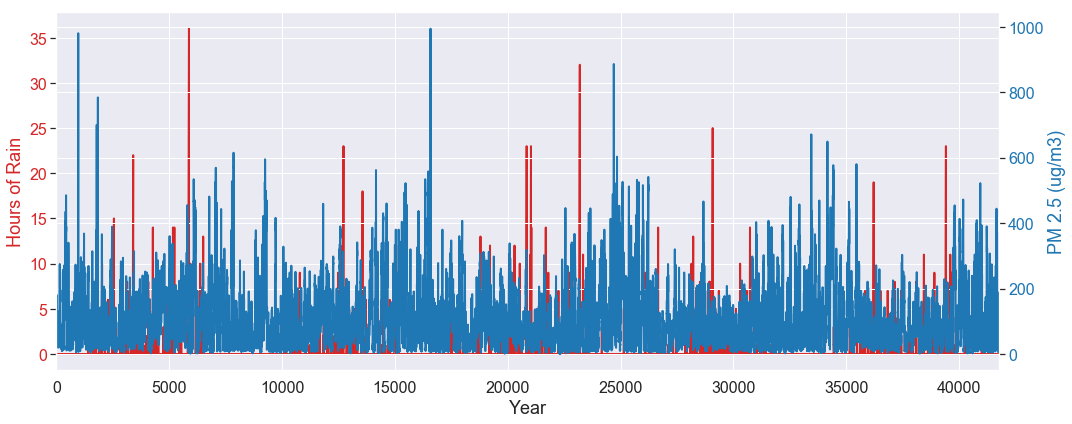

In [20]:
# Look for correlation between pm25 and rain hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['rain_hours']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Hours of Rain', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();

pm2.5 peaks appear anticorelated with rainfall, as expected (rain pulls pm2.5 out of the atmosphere).

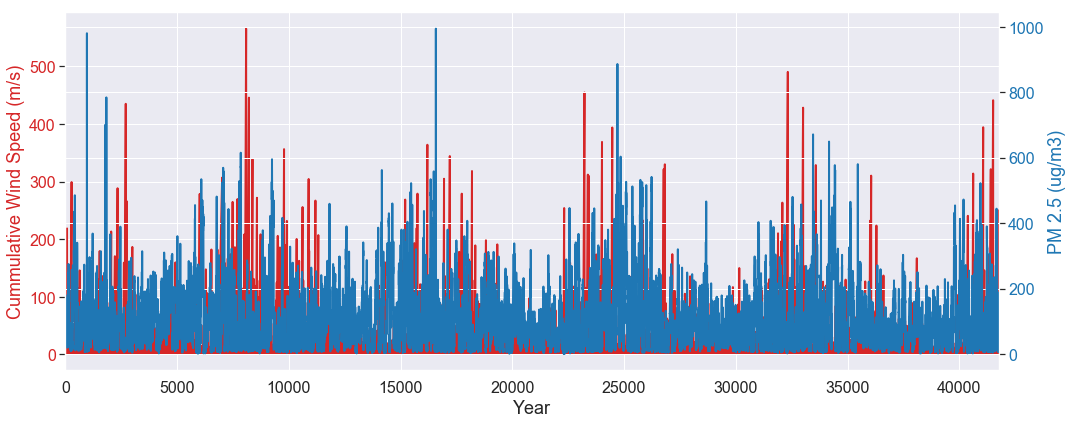

In [21]:
# Look for correlation between pm25 and cummulative wind speed
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['wind_speed']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Cummulative Wind Speed (m/s)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();

The seasonality of pm2.5 and wind-speed appear to align nicely. The pm2.5 peaks appear to slightly lag behind the wind speed peaks.

In [22]:
# the computed correlation coefficients between each time series
df.corr()['pm25']

pm25          1.000000
dewp          0.171423
temp         -0.090534
pres         -0.047282
wind_speed   -0.247784
snow_hours    0.019266
rain_hours   -0.051369
Name: pm25, dtype: float64

The strongest correlations for pm2.5 are a negative correlation with wind-speed (-0.25) and a positive correlation with dewpoint (0.17).

But, these correlation coefficients combine seasonal and trend effects with correlation.The correlation coefficients after the trends have been removed.

In [23]:
df.diff().corr()['pm25']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Once the trends have been removed, we see that pm25 is most strongly correlated with dewp (0.15). The negative correlation between pm25 and wind speed had shrunk significantly.

In [24]:
# Import libraries
from time import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import itertools
import warnings

# Classical Stats Modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prophet Model
# from fbprophet import Prophet

# Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error  
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [25]:
pm25 = df['pm25']

In [26]:
models = []

# Defining some functions for later
def forecast_bias(y_truth, y_pred):
    '''Compute mean forecasting bias'''
    bias = np.mean(y_truth - y_pred)
    return bias

def get_performance_metrics(model_name, y_truth, y_pred):
    '''Build a dictionary of regression model performance metrics: R2, MSE, and Bias'''
    metrics = {}
    metrics = {'Model': model_name, 'R2': r2_score(y_truth, y_pred), 
               'MSE': mean_squared_error(y_truth, y_pred), 
               'Bias': forecast_bias(y_truth, y_pred)}
    return (metrics)

In [29]:
# Prepare lag features out to one week #24-hours  
for i in range(1,721):
    pm25_lag_feat = "pm25_lag %s" %i
    dewp_lag_feat = "dewp_lag %s" %i
    df[pm25_lag_feat]  = df['pm25'].diff(periods=-i)
    df[dewp_lag_feat]  = df['dewp'].diff(periods=-i)

# Remove index 
df.reset_index(drop=True, inplace=True)

# Assign X and y
y = df['pm25'].iloc[:-720] #-24 
X = df.drop(['pm25'], axis=1).iloc[:-720]

# Standardize the data
Xscaled = scale(X)

# Hold out last year of data for final out-of-sample test 
X_test = Xscaled[-8760:]
y_test = y[-8760:]

# Split first four years of data into training and evaluating sets
X_train, X_eval, y_train, y_eval = train_test_split(Xscaled[:-8760], y[0:-8760], train_size=0.7, random_state=42)

ValueError: could not convert string to float: '2010-01-02 00:00:00'

In [ ]:
linreg = get_performance_metrics('Linear Regression', y_eval, LinearRegression(fit_intercept=True, copy_X=True)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(linreg)

In [ ]:
knn = linreg = get_performance_metrics('KNN Regression', y_eval, KNeighborsRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(knn)

In [ ]:
sgd = get_performance_metrics('Stochastic Gradient Descent', y_eval, SGDRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(sgd)

In [ ]:
dtr = get_performance_metrics('Decision Tree', y_eval, DecisionTreeRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(dtr)

In [ ]:
rfr = get_performance_metrics('Random Forest', y_eval, RandomForestRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(rfr)

In [ ]:
mlp = get_performance_metrics('Multi-Layer Perceptron', y_eval, MLPRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(mlp)

In [ ]:
df_models = pd.DataFrame(models).set_index('Model')
df_models = df_models[['R2', 'MSE', 'Bias']]
df_models.sort_values('R2', ascending=False)

In [ ]:
# Fit final model
final_model = MLPRegressor(random_state=42).fit(Xscaled[:-8760], y[:-8760]) #fit on all data except final year

# Make prediction on out-of-sample (test) data
y_pred = final_model.predict(X_test)
get_performance_metrics('Final Model', y_test, y_pred)

In [ ]:
# Plot
fig = plt.figure(figsize=(15,6))
y_test.reset_index()['pm25'].plot(color='red')
pd.Series(y_pred).plot(fontsize=16)
plt.title('2014 Forecast Results', fontsize=20)
plt.xlabel('Hour', fontsize=18)
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.legend(['Ground Truth', 'Prediction'], fontsize=14);
# plt.savefig('../figures/forecast_results.png');